In [104]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [298]:
Min, Max, step = 0,0.20,0.001

x = np.arange(Min,Max,step)
y = x.copy()
h = x[1]-x[0]
dx=x[1]-x[0]
dy=y[1]-y[0]
lambda_=dx**2 * dy**2

In [299]:
def h1(y):
    return 10.

def h2(y):
    return 0.

def h3(x):
    return 0.

def h4(x):
    return 0.

In [300]:
def InitE():
    
    E = np.zeros((len(x),len(y)))
    
    E[0,:] = h1(y)
    E[-1,:] = h2(y)
    E[:,0] = h3(x)
    E[:,-1] = h4(x)
    
    return E

In [301]:
E = InitE()

In [302]:
E.shape

(200, 200)

In [303]:
def Poisson(E,f,Nit = int(1e5),omega=1.5, tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( E[i+1,j] + E[i-1,j] + E[i,j+1] + E[i,j-1] ) + 0.25*h**2 * f(x[i],y[i])
                
                # Matriz resta
                r = omega*(tmp - E[i,j])
                
                # Actualizo la matrix
                E[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return E,itmax
        

In [304]:
def f(x,y):
    
    return np.exp(-x*y)

In [305]:
E = InitE()
Ef1,_ =  Poisson(E,f)

  2%|█▏                                                                       | 1622/100000 [11:48<11:56:35,  2.29it/s]

1622


In [307]:
Ef1

array([[0.00000000e+00, 1.00000000e+01, 1.00000000e+01, ...,
        1.00000000e+01, 1.00000000e+01, 0.00000000e+00],
       [0.00000000e+00, 4.99932761e+00, 6.97518244e+00, ...,
        6.97524586e+00, 4.99935971e+00, 0.00000000e+00],
       [0.00000000e+00, 3.02212807e+00, 4.99731089e+00, ...,
        4.99743762e+00, 3.02219222e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.15079940e-04, 2.29648688e-04, ...,
        2.62573617e-04, 1.31741371e-04, 0.00000000e+00],
       [0.00000000e+00, 5.77879933e-05, 1.15175081e-04, ...,
        1.31637791e-04, 6.61188243e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

<IPython.core.display.Javascript object>


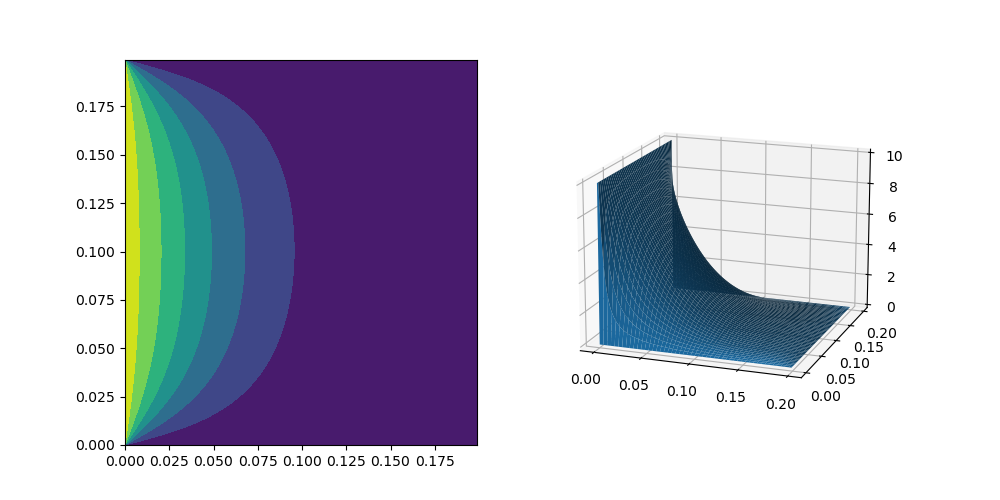

In [308]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Ef1.T)

ax1.plot_surface(X,Y,Ef1.T)